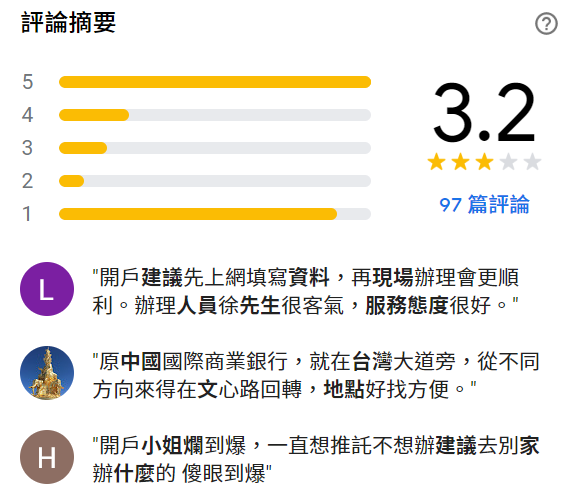

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

In [1]:
# ! pip uninstall tridentx

Found existing installation: tridentx 0.7.4.1
Uninstalling tridentx-0.7.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/trident/*
    /usr/local/lib/python3.7/dist-packages/tridentx-0.7.4.1.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled tridentx-0.7.4.1


In [12]:
! pip install /content/tridentx-0.7.4.2-py3-none-any.whl

Processing ./tridentx-0.7.4.2-py3-none-any.whl


In [28]:
import os
os.environ['TRIDENT_BACKEND'] = 'pytorch'
os.environ['TRIDENT_HOME'] = '/content/trident'
# !pip uninstall tridentx -y
# !pip install ../input/trident/tridentx-0.7.4.2-py3-none-any.whl --upgrade
from trident import *

In [15]:
mapping={
"無":"0",
"價格正面":"A",
"價格中性":"B",
"價格負面":"C",
"品質正面":"D",
"品質中性":"E",
"品質負面":"F",
"服務正面":"G",
"服務中性":"H",
"服務負面":"I",
"環境正面":"J",
"環境中性":"K",
"環境負面":"L",
"其他正面":"M",
"其他中性":"N",
"其他負面":"O"}

In [21]:
data=open('/content/customer_emotional_corpus.txt',encoding='utf-8-sig').readlines()


print(data[:5])

['1\t只要10塊錢。\tAAAAAAA\n', '2\t這個價格在火車站來說已經很親民了。\t000000000000MMMM0\n', '3\t而且味道也好。\t00DDDDD\n', '4\t很清淡。\tDDDD\n', '5\t啦啦。\t000\n']


(array([2.0807e+04, 6.5630e+03, 1.6580e+03, 7.2200e+02, 7.5800e+02,
        2.8400e+02, 1.4300e+02, 6.7000e+01, 1.5000e+01, 8.0000e+00]),
 array([2.0000e+00, 2.6800e+01, 5.1600e+01, 7.6400e+01, 1.0120e+02,
        1.2600e+02, 1.5080e+02, 1.7560e+02, 2.0040e+02, 2.2520e+02,
        2.5000e+02]),
 <a list of 10 Patch objects>)

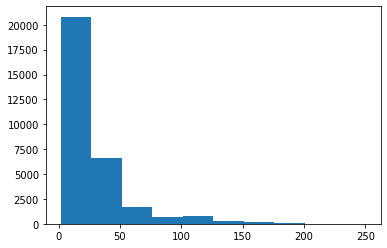

In [22]:
lengths=np.array([len(text.split('\t')[1]) for text in data])
counts, bins = np.histogram(lengths)
plt.hist(bins[:-1], bins, weights=counts)

In [23]:
str_full_to_half=ToHalfWidth()
new_data=[]
new_tag=[]

for raw in tqdm(data):
    cols=raw.strip().split('\t')
    idx=cols[0]
    content=str_full_to_half(cols[1].strip())
    tag=cols[2]
    if len(content)==len(tag):
        new_data.append(content)
        new_tag.append(tag)
    else:
        print(content,len(new_data),tag,len(new_tag))
print('content:',len(new_data),'tag:',len(new_tag))
print('content:',new_data[:5],'tag:',new_tag[:5])



data_provider=load_text(data=new_data, label=new_tag,unit='char',mode='1to1_seq2seq',is_onehot=False,sequence_length=250,sequence_start_at='section_start')
data_provider.dynamic_padding=True

data_provider.traindata.data.transform_funcs=[
    BopomofoConvert(convert_ratio=0.01),
    ChineseConvert(convert_to='simplified',convert_ratio=0.01),
    RandomHomomorphicTypo(convert_ratio=0.02),
    RandomHomophonicTypo(convert_ratio=0.02),
    ToHalfWidth()
    ]





t1,t2=data_provider.next()

print(data_provider.signature)
print(data_provider.traindata.label.vocabs)

100%|██████████| 31025/31025 [00:01<00:00, 18208.30it/s]


content: 31025 tag: 31025
content: ['只要10塊錢。', '這個價格在火車站來說已經很親民了。', '而且味道也好。', '很清淡。', '啦啦。'] tag: ['AAAAAAA', '000000000000MMMM0', '00DDDDD', 'DDDD', '000']
total distinct chars: 3459
total distinct chars: 21
chardict.pkl: 361MB [00:00, 979MB/s]    
data_provider( ) -> input: Tensor[(None, 250)] (ObjectType.corpus), label: Tensor[(None, 250)] (ObjectType.sequence_label) 
['[PAD]', '[CLS]', '[SEP]', '[UNK]', '[MASK]', '0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


In [26]:
for k in range(3):
    print(''.join([data_provider.index2text(i) for i in t1[k]  if i!=0] ))
    print(''.join([data_provider.index2label(i) for i in t2[k]  if i!=0] ))
    print('')

    
print('')
print(''.join(data_provider.vocabs))
print('')
print(''.join(data_provider.label_vocabs))
print('')
print(data_provider.label2index('A'))

[CLS]一直挺喜歡炸雞店的手槍腿的哈,很[UNK]在,前陣子去中原地區竟然發現新開的太平洋廣[UNK]竟然開了一家炸雞店,門口還放著花籃,果斷拉著朋友一起進去了哈~ 進門發現人還不少啊,排了大概5分鐘就能點擔了,大雞腿套餐來一份~ 寶寶每次路過都會進去買一份,喜歡炸雞店的原因主要還是這里的雞腿🍗面粉少,雞肉嫩,還有汁水0~。[SEP]
[CLS]00DDDDDDDDDDD00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000DDDDDDDDD0[SEP]

[CLS]捧著一本自己喜歡的小說邊吃邊看。[SEP]
[CLS]0000000000000000[SEP]

[CLS]環境不錯,有小孩玩的地方,價格還是有點貴的。[SEP]
[CLS]JJJJJJJJJJJJJCCCCCCCC0[SEP]


[PAD][CLS][SEP][UNK][MASK] !#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz|~ ¡¬°·Ûòóƪȷʃʔʕ˂˃ˇˉˊˋˍ˘˙˵˶̴̶̷̛̣̤̥̫͈̀́̂̅͟͞͡εοπωЁЗдзө؂و٩ڡ۶ूଓଘ௰ಡฅงั็๑๓ᗨᴖᴗᴥᵒᵕ᷄᷅ ​‍—‘’“”•…′‸‼⁄⁍⁎⁶⁻⁽⁾₃₆€⃣℃←→↖↗∀∇∠∩∵≦≧⊙⊿⋯⌒⌓⌔⌚⌣━┻╥╭╮╯╰□▽○◍●◜◝◡☁★☆☔☕☜☞☹☺☻♀♡♩♪♫♬⛪⛰✈✌✧✨✪❛❣❤➕➰⭐⸜⸝、。《》「」『』【】〔〕〖〗〜っづのゞノヘ・ヽヾㅁㅂㅍ㉨一丁七丈三上下不丐丑且世丘丙丟丫中串丶丸丹主乃久么之乎乏乖乘九乞也乳乾亂了予亊事二于云互五井些亞交亦亨享京亭亮人什仁仇今介仍仔仕他付仙仟代令以仨仰仲件任份仿企伊伍伏伐休伙伢伯估伴伸似但佈位低住佐佑佔何佘余佛作你佩佰佳佻使侄來侈例侖供依侮侯侶便促俊俏俑俗保信修俱俺倆倉個倍們倒候借倡倦倩倪倫值假偉偌偏做停健側偶偷傅傍傘備催傲傳債傷傻傾僅像僵價僻儀億償優儲允元兄充兆兇先光克兌免兒兔兜兢入內全兩八公六兮共兵其具典兼冉冊再冒冠冤冬冰冷凈凌凍凝凡凰凱凳凸凹出刀刁分切刊列初別利刪

In [29]:
#批次8
#輸入文字 [8,250]
#Embedding輸出 [8,250,256]
#permute [8,256,250]
textcnn=Sequential(
        Embedding(embedding_dim=256,num_embeddings=len(data_provider.vocabs),sparse=False,name='embed'),
        Permute(0,2,1),#(Batch,Sequence,Channel)=>(Batch,Channel,Sequence)
        ConcateBlock(
            Sequential(
                Conv1d_Block(kernel_size=3,num_filters=512,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch',dilation=1,dropout_rate=0.1),
                Conv1d_Block(kernel_size=3,num_filters=256,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch')
            ),
            Sequential(
                Conv1d_Block(kernel_size=5,num_filters=512,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch',dilation=1,dropout_rate=0.1),
                Conv1d_Block(kernel_size=3,num_filters=256,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch')
            ),
            Sequential(
                Conv1d_Block(kernel_size=7,num_filters=512,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch',dilation=1,dropout_rate=0.1),
                Conv1d_Block(kernel_size=3,num_filters=256,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch')
            ),
            Sequential(
                Conv1d_Block(kernel_size=7,num_filters=512,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch',dilation=4,dropout_rate=0.1),
                Conv1d_Block(kernel_size=3,num_filters=256,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch')
            ),
            Sequential(
                Conv1d_Block(kernel_size=7,num_filters=512,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch',dilation=8,dropout_rate=0.1),
                Conv1d_Block(kernel_size=3,num_filters=256,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch')
            )
        ),
        Conv1d_Block(kernel_size=3,num_filters=512,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch'),
        Conv1d_Block(kernel_size=3,num_filters=128,strides=1,auto_pad=True,activation='leaky_relu',normalization='batch'),
        Conv1d_Block(kernel_size=1,num_filters=len(data_provider.label_vocabs),strides=1,auto_pad=True,activation=None),
        SoftMax(axis=1)
    )

In [30]:
def test_reading(training_context):
    """

    :param training_context:
    :type training_context:
    """
    global data_provider
    def compare_color(text1,text2):
        if text1==text2:
            return green_color(text1)
        else:
            return red_color(text1)
    epoch = training_context['current_epoch']
    batch = training_context['current_batch']
    num_batch = training_context['total_batch']
    if (epoch * num_batch + batch+1)% 500 == 0:
        model =training_context['current_model']
        # 模型千萬記得要轉換成eval模式
        model.eval()
        data_feed=training_context['data_feed']
        training_data=training_context['train_data']

        input=training_context['train_data'][data_feed[model.signature.inputs.key_list[0]]].to(model.device)
        output=argmax(model(input),1)
        target=training_context['train_data'][data_provider.traindata.label.symbol].to(model.device)

        for k in range(3):
            this_input=to_numpy(input[k])
            this_output=to_numpy(output[k]) 
            this_target=to_numpy(target[k])
            in_text=[data_provider.index2text(this_input[i]) for i in range(len(this_input)) if this_input[i]!=0]
            out_text=[compare_color(data_provider.index2label(this_output[i]),data_provider.index2label(this_target[i]))for i in range(len(this_output)) if this_output[i]!=0]
            target_text=[data_provider.index2label(this_target[i]) for i in range(len(this_target)) if this_target[i]!=0]
            
            print('輸入序列:'+''.join(in_text))
            print('輸出標籤:'+''.join(out_text))
            print('實際標籤:'+''.join(target_text))
            print('')
        model.train()



model = Model(inputs=t1, output=textcnn)\
    .with_optimizer(optimizer=AdaBelief, lr=2e-4, betas=(0.9, 0.999),gradient_centralization='all')\
    .with_loss(CrossEntropyLoss(ignore_index=[0,1,2,3,4,5],auto_balance=True),loss_weight=0.5, name='cross entropy1')\
    .with_loss(CrossEntropyLoss(),loss_weight=1, name='cross entropy2')\
    .with_metric(accuracy,ignore_index=[0,1,2,3,4], name='accuracy')\
    .with_metric(recall,ignore_index=[0,1,2,3,4], name='recall')\
    .with_regularizer('l2',reg_weight=1e-7)\
    .trigger_when('on_batch_end', action=test_reading)\
    .with_learning_rate_scheduler(PolyLR(max_lr=1e-3, min_lr=1e-7, power=2, period=4000, cycle=True, unit='batch')) \
    .with_model_save_path('/content/Models/textcnn.pth')\
    .with_automatic_mixed_precision_training()

#model.load_model('../input/read-customers-mind/Models/textcnn.pth')
# model.load_model('/content/Models/textcnn.pth')

model.summary()

CrossEntropyLoss( output: Tensor[(None,)] , target: Tensor[(None,)] ) -> loss: Tensor[(None,)]  
cross entropy1 SoftMax
CrossEntropyLoss( output: Tensor[(None,)] , target: Tensor[(None,)] ) -> loss: Tensor[(None,)]  
cross entropy2 SoftMax
accuracy( output: Tensor[(None,)] , target: Tensor[(None,)] , topk: int =1, axis: int =1, ignore_index: int =-100, exclude_mask: bool =False) -> output: Tensor[(None,)]  
recall( output: Tensor[(None,)] , target: Tensor[(None,)] , axis: int =1, ignore_index: int =0) -> output: Tensor[(None,)]  
automatic mixed precision training only enable when using pytorch 1.6 (or higher) as backend and cuda is available.
--------------------------------------------------------------------------------------------------------------------------------
              Layer (type)               Output Shape               Weight                        Bias      Param #   FLOPS #                  
0  [Embedding]                           [None, 153, 256]           'weight

Model(
  (_losses): <trident.optims.pytorch_losses.CrossEntropyLoss object at 0x7f8423a5fb10>
  (_losses): <trident.optims.pytorch_losses.CrossEntropyLoss object at 0x7f8423a5fad0>
  (_metrics): functools.partial(<function accuracy at 0x7f8425b4e7a0>, ignore_index=[0, 1, 2, 3, 4])
  (_metrics): functools.partial(<function recall at 0x7f8425ad23b0>, ignore_index=[0, 1, 2, 3, 4])
  (loss_weights): 0.5
  (loss_weights): 1.0
  (_regs): <function l2_reg at 0x7f8425b4e830>
)

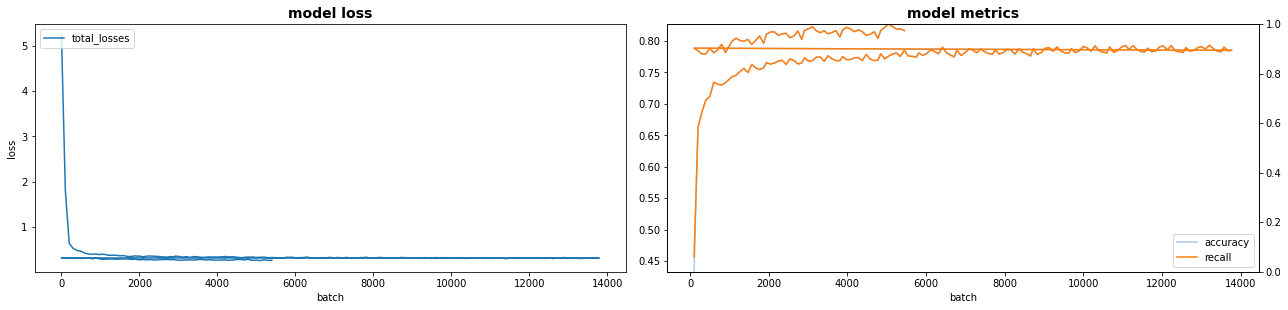

[0]  Tesla T4 |   50°C  28% | 10380 /15109.0 MB  68.70%
model 0         first_layer gradients: 1.308e+00 |last_layer gradients: 9.279e+02 

model 0  Step: 158ms    | Loss: 0.272 | accuracy: 81.729% , recall: 81.729%  | lr: 9.403e-05  | epoch: 5  ( 700/970 )
model 0  Step: 158ms    | Loss: 0.270 | accuracy: 81.839% , recall: 81.839%  | lr: 8.653e-05  | epoch: 5  ( 800/970 )
model 0  Step: 157ms    | Loss: 0.270 | accuracy: 81.026% , recall: 81.026%  | lr: 7.933e-05  | epoch: 5  ( 900/970 )
model 0 out-of-sample evaluation: accuracy: 85.754%,recall: 85.754%
{ cross entropy1: 0.013, cross entropy2: 0.056, l2_reg_Loss: 0.089, total_losses: 0.158 }
model 0  Step: 269ms    | Loss: 0.253 | accuracy: 82.595% , recall: 82.595%  | lr: 6.782e-05  | epoch: 6  ( 100/970 )
輸入序列:[CLS]好多年沒吃炸雞店,跟以前大不一樣呢,這次因為集享卡送脆皮炸雞券來的。[SEP]
輸出標籤:[CLS]0000000000000000000000000000000000[SEP]
實際標籤:[CLS]0000000000000000000000000000000000[SEP]

輸入序列:[CLS]口味還不錯?就是服務真心一般?驗證等半天。[SEP]
輸出標籤:[CLS]DDDDDD00GIHHHHHIIIIII[SEP]
實際標籤:

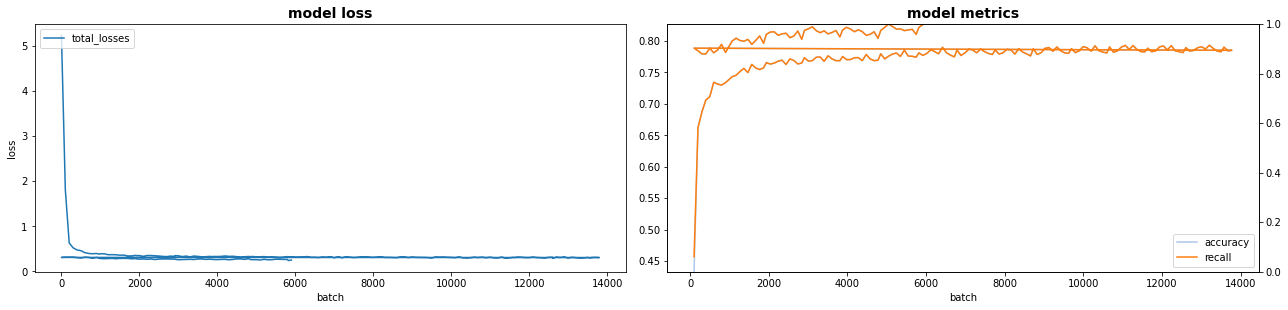

[0]  Tesla T4 |   50°C  25% | 10378 /15109.0 MB  68.69%
model 0         first_layer gradients: 1.459e+00 |last_layer gradients: 7.312e+02 

model 0  Step: 159ms    | Loss: 0.257 | accuracy: 82.867% , recall: 82.868%  | lr: 6.147e-05  | epoch: 6  ( 200/970 )
model 0  Step: 158ms    | Loss: 0.259 | accuracy: 82.250% , recall: 82.250%  | lr: 5.544e-05  | epoch: 6  ( 300/970 )
model 0  Step: 158ms    | Loss: 0.255 | accuracy: 82.533% , recall: 82.533%  | lr: 4.971e-05  | epoch: 6  ( 400/970 )
model 0  Step: 159ms    | Loss: 0.257 | accuracy: 82.250% , recall: 82.250%  | lr: 4.430e-05  | epoch: 6  ( 500/970 )
model 0  Step: 157ms    | Loss: 0.264 | accuracy: 81.810% , recall: 81.810%  | lr: 3.920e-05  | epoch: 6  ( 600/970 )
輸入序列:[CLS]菜品味道鮮美,環境不錯,好評。[SEP]
輸出標籤:[CLS]DDDDDDDJJJJJMMM[SEP]
實際標籤:[CLS]DDDDDDDJJJJJMMM[SEP]

輸入序列:[CLS][UNK]振有詞我們就是馬上要關門了沒有了。[SEP]
輸出標籤:[CLS]000000000000000000[SEP]
實際標籤:[CLS]000000000000000000[SEP]

輸入序列:[CLS]這家位于連江路交叉口永輝超市旁邊,這家開了蠻好,已前活動更多[UNK]天喇叭說買一送一,現在少了,只有18號才有,現在

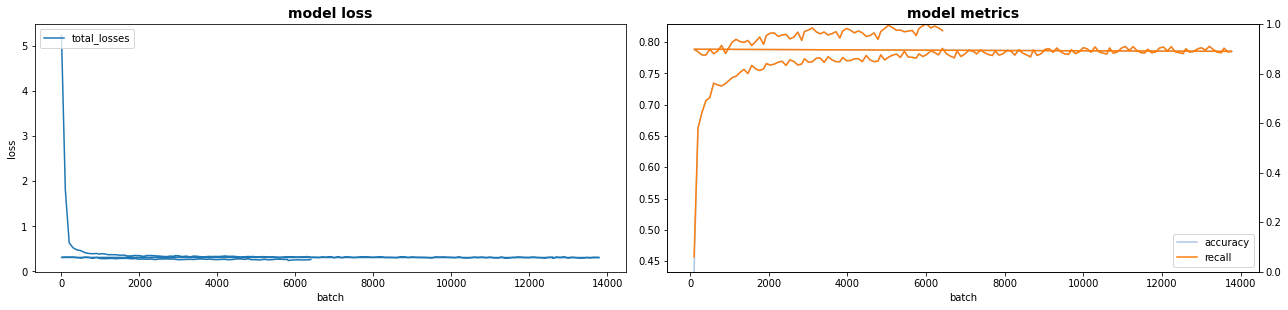

[0]  Tesla T4 |   51°C   3% | 10382 /15109.0 MB  68.71%
model 0         first_layer gradients: 3.634e+00 |last_layer gradients: 2.918e+03 

model 0  Step: 160ms    | Loss: 0.263 | accuracy: 81.892% , recall: 81.892%  | lr: 3.441e-05  | epoch: 6  ( 700/970 )
model 0  Step: 157ms    | Loss: 0.266 | accuracy: 82.208% , recall: 82.208%  | lr: 2.994e-05  | epoch: 6  ( 800/970 )
model 0  Step: 158ms    | Loss: 0.265 | accuracy: 81.251% , recall: 81.251%  | lr: 2.578e-05  | epoch: 6  ( 900/970 )
model 0 out-of-sample evaluation: accuracy: 88.169%,recall: 88.169%
{ cross entropy1: 0.017, cross entropy2: 0.079, l2_reg_Loss: 0.089, total_losses: 0.185 }


In [ ]:
plan=TrainingPlan()\
    .add_training_item(model)\
    .with_data_loader(data_provider)\
    .repeat_epochs(10)\
    .with_batch_size(32)\
    .print_progress_scheduling(100,unit='batch')\
    .print_gpu_utilization(frequency=500, unit='batch') \
    .display_loss_metric_curve_scheduling(frequency=500,unit='batch',imshow=True)\
    .print_gradients_scheduling(500)\
    .save_model_scheduling(200,unit='batch')  

plan.start_now()

In [3]:
! pip install onnxruntime

     |████████████████████████████████| 5.2 MB 5.2 MB/s 


In [2]:
! pip install onnx

     |████████████████████████████████| 12.8 MB 5.4 MB/s 


In [ ]:
max_seq_length=250
print(get_device())

model.eval()

model.model.to(get_device())
dummy_input = clip(torch.randn(1, max_seq_length),0,len(data_provider.vocabs)-1).long().to(get_device())
torch.onnx.export(model.model, dummy_input, '/content/Models/textcnn.onnx',opset_version=10, verbose=False, input_names=['input'], output_names=['output'])
from IPython.display import FileLink 
FileLink('/content/Models/textcnn.onnx')

In [17]:
! pip install onnxruntime-gpu

In [22]:
import onnx
import onnxruntime as ort

#載入onnx模型至onnxruntime
ort_session = ort.InferenceSession('/content/Models/textcnn.onnx',providers=['CUDAExecutionProvider'])
#取出輸入張量形狀
input_name = ort_session.get_inputs()[0].name
input_name

'input'

In [23]:
def sentence2opinion(words):
  inp=np.expand_dims(np.array([1]+[ data_provider.text2index(t) for t in  words]+[2]+[0]*(max_seq_length-len(words)-2)),0).astype(np.int64)

  #透過onnx進行推論
  pred_intent= ort_session.run([], {"input": inp})[0]

  #透過argmax找出機率最高前三名的意圖索引位置
  idxex=argmax(pred_intent,-1)[0]
  idxex=[data_provider.index2label(idxex[i]) for i in range(len(idxex)) if idxex[i]!=0]
  return ''.join(idxex)

In [27]:
print(sentence2opinion('原中國國際商業銀行就在台灣大道旁，從不同方向來得在文心路回轉，地點好找方便'))

[UNK][UNK][UNK][UNK]G[UNK]NNMML[UNK]AL[UNK][UNK][UNK][UNK]ML
